In [1]:
import os
from glob import glob
from LRF_functions import * 
import matplotlib.pyplot as plt

csv_path = r'/nobackup/users/donnelly/LRF_csv/'
plot_path = r'/nobackup/users/donnelly/LRF_plots/'

In [2]:
#LRF0_files = glob(os.path.join(csv_path, "LRF0-*"))
#for file in LRF0_files:
#    key = os.path.splitext(os.path.basename(file))[0]
#    df = pd.read_csv(file)
#    plot = LRF_ts(df,key,plot_path)

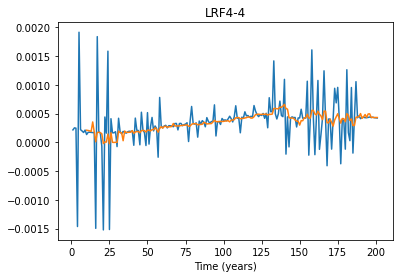

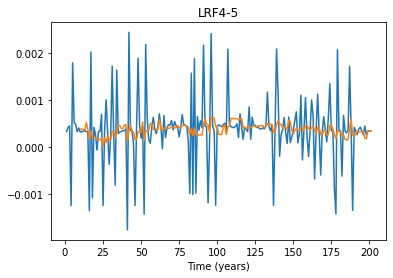

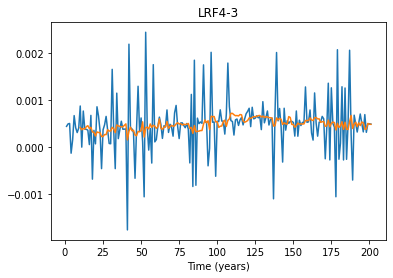

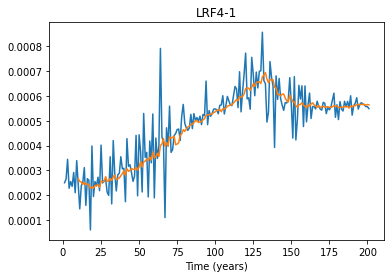

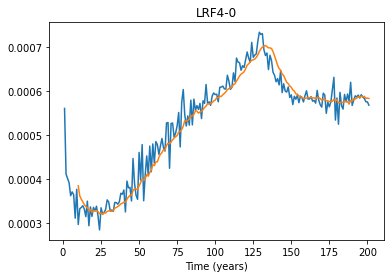

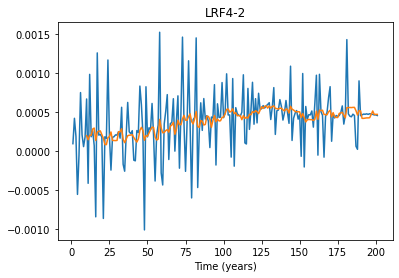

<Figure size 432x288 with 0 Axes>

In [3]:
LRF4_files = glob(os.path.join(csv_path, "LRF4-*"))
for file in LRF4_files:
    key = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    plot = LRF_ts(df,key,plot_path)

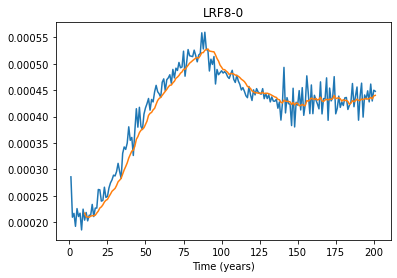

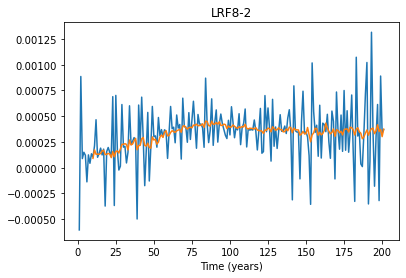

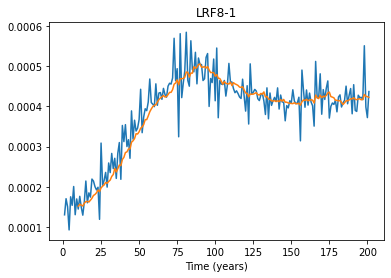

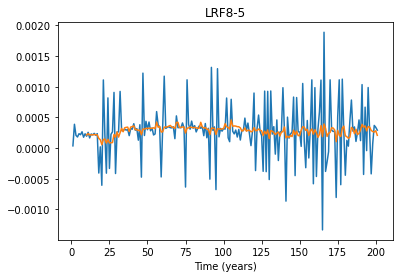

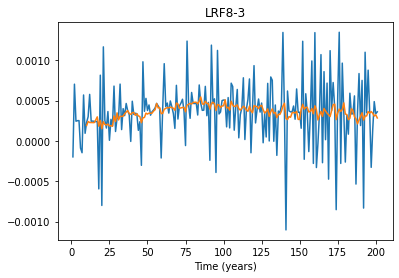

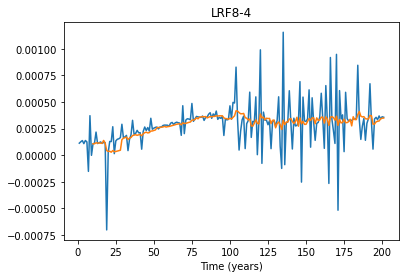

<Figure size 432x288 with 0 Axes>

In [4]:
LRF8_files = glob(os.path.join(csv_path, "LRF8-*"))
for file in LRF8_files:
    key = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    plot = LRF_ts(df,key,plot_path)

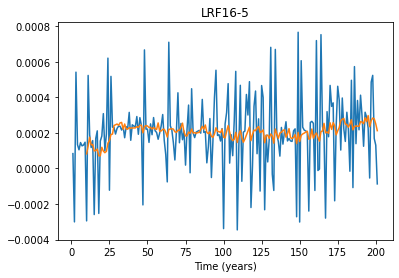

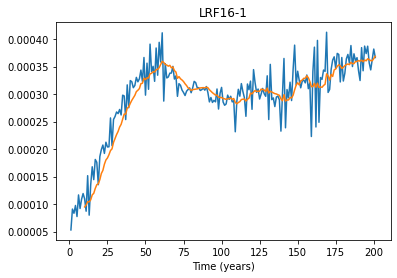

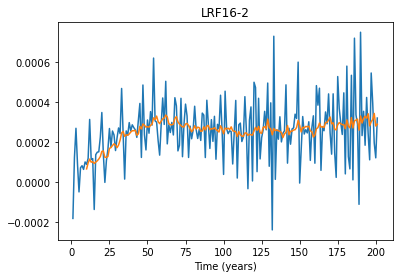

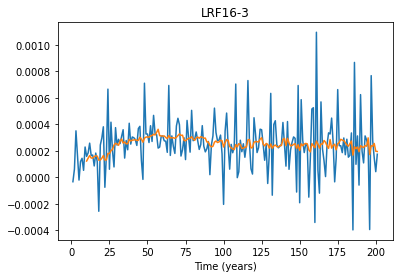

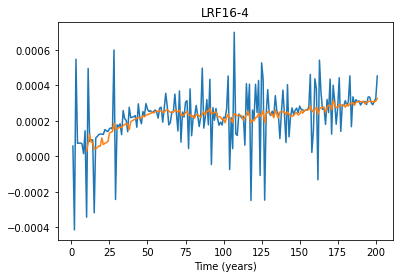

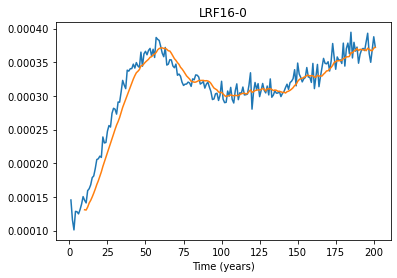

<Figure size 432x288 with 0 Axes>

In [5]:
LRF16_files = glob(os.path.join(csv_path, "LRF16-*"))
for file in LRF16_files:
    key = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    plot = LRF_ts(df,key,plot_path)

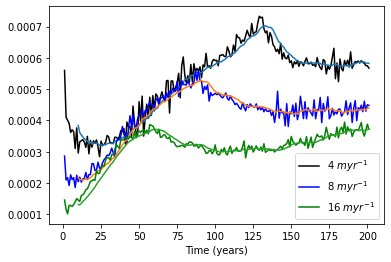

In [18]:
LRF_Ant = glob(os.path.join(csv_path, "LRF*-0.csv"))
#for file in sorted(LRF_Ant):


key = os.path.splitext(os.path.basename(LRF_Ant[2]))[0]
df = pd.read_csv(LRF_Ant[2])
plt.plot(df["LRF"], label = "4 $m yr^{-1}$", color = "black")
plt.plot(df["SMA10"])
plt.xlabel("Time (years)")
plt.legend()

key = os.path.splitext(os.path.basename(LRF_Ant[0]))[0]
df = pd.read_csv(LRF_Ant[0])
plt.plot(df["LRF"], label = "8 $m yr^{-1}$", color = "blue")
plt.plot(df["SMA10"])
plt.xlabel("Time (years)")
plt.legend()

key = os.path.splitext(os.path.basename(LRF_Ant[1]))[0]
df = pd.read_csv(LRF_Ant[1])
plt.plot(df["LRF"], label = "16 $m yr^{-1}$", color = "green")
plt.plot(df["SMA10"])
plt.xlabel("Time (years)")
plt.legend()


    


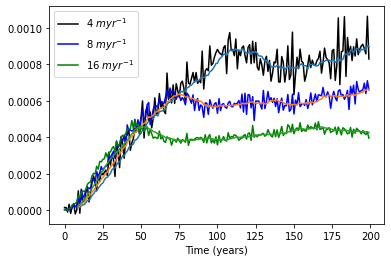

In [15]:
LRF_lev = glob(os.path.join("/nobackup/users/donnelly/levermann_LRF", "*.dat"))

#for file in sorted(LRF_lev):
#    key = os.path.splitext(os.path.basename(file))[0]
#    df = pd.read_csv(file)
#    df['SMA10'] = df.LRF.rolling(10).mean()
#    plt.plot(df["LRF"], label =  key)
#    plt.plot(df["SMA10"])
#    plt.xlabel("Time (years)")
#    plt.legend()
    
LRF_lev

df1 = pd.read_csv(LRF_lev[0])
key = os.path.splitext(os.path.basename(LRF_lev[0]))[0]
df1['SMA10'] = df1.LRF.rolling(10).mean()
plt.plot(df1["LRF"], label =  "4 $m yr^{-1}$", color = "black")
plt.plot(df1["SMA10"])
plt.xlabel("Time (years)")
plt.legend()

df2 = pd.read_csv(LRF_lev[1])
key = os.path.splitext(os.path.basename(LRF_lev[1]))[0]
df2['SMA10'] = df2.LRF.rolling(10).mean()
plt.plot(df2["LRF"], label =  "8 $m yr^{-1}$", color = "blue")
plt.plot(df2["SMA10"])
plt.xlabel("Time (years)")
plt.legend()

df3 = pd.read_csv(LRF_lev[2])
key = os.path.splitext(os.path.basename(LRF_lev[2]))[0]
df3['SMA10'] = df3.LRF.rolling(10).mean()
plt.plot(df3["LRF"], label =  "16 $m yr^{-1}$", color = "green")
plt.plot(df3["SMA10"])
plt.xlabel("Time (years)")
plt.legend()

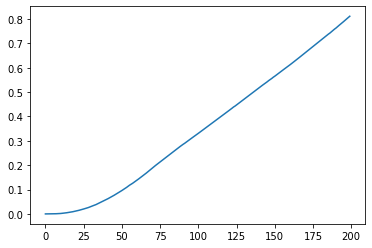

In [8]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv

# BISI_LBL
# BM08
larmip_path = r'/nobackup/users/donnelly/levermann_LRF'

fname = larmip_path + '/VaFDiffControl-SLE-larmip.6-8.1km' # File to read
with open(fname) as f:
    time = np.array([float(row[:17]) for row in f])
with open(fname) as f:
    sl = -np.array([float(row[18:])/1000 for row in f])
BISI_LBL_1KM_BM08_R0 = []
for t in range(200):
    ind = 0
    for i in range(len(time)):
        if time[i]<=t and time[i+1]:
            ind = i
    val = sl[ind]+(t-time[ind])/(time[ind+1]-time[ind])*(sl[ind+1]-sl[ind])
    BISI_LBL_1KM_BM08_R0.append(val)
    

BISI_LBL_1KM_BM08_R0=np.array(BISI_LBL_1KM_BM08_R0)
RF_BISI_LBL_1KM_BM08_R0=np.diff(BISI_LBL_1KM_BM08_R0)/8
RF_BISI_LBL_1KM_BM08_R0=np.append(RF_BISI_LBL_1KM_BM08_R0[0],RF_BISI_LBL_1KM_BM08_R0)
plt.plot(BISI_LBL_1KM_BM08_R0,label="BISI_LBL_1KM_BM08_R0")

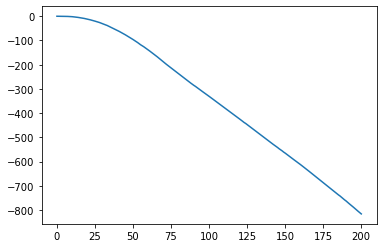

In [9]:
LRF_Ant = glob(os.path.join(csv_path, "LRF*-0.csv"))
for file in LRF_Ant:
    key = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    df['vafdiff'] = df.volumeAbove.diff()
    df['potat'] = df.SLE - df.SLE.iloc[0]
    plt.plot(df['potat'], label = key)
    plt.xlabel("Time (years)")
    plt.legend()
    
df1 = pd.read_csv(larmip_path + '/VaFDiffControl-SLE-larmip.6-8.1km', sep = '\s+', names= ['time','VAF'])

plt.plot(df1['time'],df1['VAF'])